# 키워드

- 1. 매소드 / 함수
- 2. axis 축
- 3. NaN

In [13]:
# 판다스 가져오기 및 별칭 설정
import pandas as pd
import numpy as np
# 판다스 버전확인
pd.__version__

'1.2.4'

## 1.3. 판다스를 사용하는 이유 - 메소드나 함수
 - 판다스는 모양이나 차원이 다른경우 먼저 브로드캐스팅(broadcasting)을 해서 모양을 맞춘 후에 내부의 원소를 계산한다.
 - 또 한 없는 데이터(NaN)가 발생하더라도 내부적으로 예외를 발생시키지 않고 데이터를 처리하면 차원별로 계산이 가능하다.

### 1.3.1 브로드 캐스팅 및 벡터화 연산
 - 판다스에 있는 시리즈나 / 데이터프레임은 다차원 데이터이다. 이 원소들을 순환문(loop)을 이용해 처리하기 보다 내부적으로 각 원소별로 처리하는 것이 더 편함
 - 여러 원소를 가진 시리즈나 데이터프레임의 원소의 개수를 맞추는 것을 브로드 캐스팅(broadcasting)이라 함.
 - 이를 한번에 연산처리하는 것을 벡터화 연산(vectorizing)이라고 함

#### 브로드 캐스팅과 벡터화 연산
 - 시리즈나 데이터 프레임은 여러 차원으로 구성된 데이터이므로 이를 계산할 경우 각 원소들의 개수를 차원단위로 맞춰야 함.
 - 이를 자동으로 맞춘 후에 연산을 처리하므로 실제 차원이 다르다면 차원을 맞추는 일을 먼저 수행한 후에 연산을 처리해야 함.

In [14]:
# 브로드캐스팅과 벡터화 처리하기
list_a = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
    ]

df = pd.DataFrame(data=list_a, columns=list('abc'))
df

#  결과 분석
#  원소 9개 / 3행 3열 / 행의 레이블 지정x == 내부적으로 일련의 숫자로 처리됨

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [15]:
df1 = pd.DataFrame(
    data=[
        [3,3,3],
        [3,3,3],
        [3,3,3]
        ],
    columns=list('abc')
    )
df1

,a,b,c
0,3,3,3
1,3,3,3
2,3,3,3


In [16]:
df + 3

# 결과 분석
#  df는 3행 3열 데이터 프레임인데 단순히 상수 3을 더했는데 각 원소들에 다 +3이 되었다.
#  이 말은 실제 상수 3이 3행 3열의 데이터프레임으로 바뀌는 브로드 캐스팅 처리가되고
#  그 후 + 연산자로 각 원소별로 계산이 된것이다. 

,a,b,c
0,4,5,6
1,7,8,9
2,10,11,12


In [48]:
# 즉 원소 3이 3행 3열로 채워 만들어진 df1과 같다는 의미인데,
df + df1
# 실제로 3이 3행 3열로 채워진 데이터프레임과의 연산이나, 상수 3과의 더하기 연산의 결과가 같음을 알 수 있다.
# 실제 순환문(loop)이 없이 내부적으로 9개의 원소들끼리 덧셈연산이 처리되었는데 이런처리를 벡터화 연산이라고 한다.
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [12]:
# type(df.__add__)
print(type(df.__add__))

# df.__add__.__func__
print(type(df.__add__.__func__))

#판다스에서는 데이터

<class 'method'>
<class 'function'>


## 위의 코드를보면
 - 파이썬의 덧셈 연산은 내부적인 __add__라는 스페셜 메소드로 제공한다.
 - 이 연산자 내부의 함수 __func__를 확인하면 실제 함수가 들어 있는 것을 확인 할 수 있다.

 - 파이썬은 내부적으로 method라는 클래스가 만드는 메소드가 있고(. __add__ )
 - 그 메소드 내부에는 실제 수행하는 함수가 존재한다.(. __func__ )

In [18]:
# type(df.add)
print(type(df.add))

# df.add.__func__
print(type(df.add.__func__))

<class 'method'>
<class 'function'>


## 위의 코드를보면
 - 판다스에서는 데이터 프레임 안의 연산자 말고도 add라는 메소드도 별도로 제공한다.
 - 이 add라는 메소드는 스페셜 메소드(__add__ 등 __ __안에 감싸진 것들)와 동일하게 method 클래스에서 만들어 진것을 알 수 있다.
 - 매소드 내부에 __func__를 보면 함수가 저장되어 있다.

 - 이처럼 판다스에서 스페셜 메소드와 메소드를 이중으로 제공하는 이유는 실제 연산자 연산 말고 다양한 매개변수를
 - 매소드에 넣어 기능을 확장처리 할 수 있도록 하기 때문이다.

In [19]:
df.__add__.__func__ is df.add.__func__
# 스페셜메소드와 메소드안 함수는 다르다.

False

## 1.3.2 누락 값을 포함한 데이터 처리
 - 판다스 클래스 들의 특징은 실제 원소의 값이 들어가 있지 않아도 예외가 없이 처리된다는 것이다.
 - 판다스 모듈에 있는 대부분의 클래스는 대용량 데이터를 처리할 때 누락 값(missing)이 있어도 예외를 발생시키지 않고 처리한다.

 - 판다스에서는 데이터없음, 누락값을 NaN으로 표현한다. 이 NaN값은 넘파이 모듈에서 np.nan 을 의미한다.
 - 누락 값 연산 처리할 때 수학 메소드들은 실제 값들이 있을 때만 계산을 수행하고 아닌경우를 NaN으로 처리한다.
 - NaN값은 논리식으로 하면 False이다.
 - 누락값인 NaN은 판다스에서는 float으로 지정해서 관리하므로 NaN이 포함된(컬럼) 자료형은 float이 된다. 

In [30]:
a = [1,2,3, np.nan]
df_na = pd.DataFrame(a)
df_na

,0
0,1.0
1,2.0
2,3.0
3,NaN


In [38]:
print("===input>> df_na.sum() ===")
print(df_na.sum())
print("===input>> df_na.sum(skipna=False) ===")
print(df_na.sum(skipna=False))
print("===input>> df_na<3 ===")
print(df_na < 4)
print("===input>> df_na< np.nan ===")
print(df_na< np.nan)

===input>> df_na.sum() ===
0    6.0
dtype: float64
===input>> df_na.sum(skipna=False) ===
0   NaN
dtype: float64
===input>> df_na<3 ===
       0
0   True
1   True
2   True
3  False
===input>> df_na< np.nan ===
       0
0  False
1  False
2  False
3  False


 - 데이터프레임.sum() 메소드(데이터프레임 내부(.)의 sum메소드(sum)을 실행하면
 - 모든 원소를 더하고(열끼리) 더한 값을 반환한다.
 - 반환값은 1차원 시리즈 이다. ( 열끼리 더하면 어떤 큰 2차원 데이터프레임이 와도 1차원으로 반환할 수 있기때문)
 - 누락 값은 계산하지 않고 숫자만 계산해서 반환한다.

 - 데이터프레임 내부의 sum메소드에서 모든 원소를 전부 계산하고싶을때(NaN값 포함)
 - 매개변수 skipna=False로 지정하면 누락 값을 포함해서 계산하게 된다.
 - 그리고 NaN값이 포함된 원소를 연산하게되면
 - 결과 값은 NaN 처리된다.
 - 즉 모든 NaN값과 계산된 결과는 NaN값 처리된다.

 - 비교연산자(==, >, < 등)을 사용하면 결과값은 True / False로 반환되는데
 - 누락값(NaN)과의 비교는 항상 False로 반환된다.

## 1.3.3 축
 - 판다스는 다차원 계산을 처리하므로 각 차원에 대한 축을 기준으로 계산한다
 - 축을 이용해 데이터 원소를 연결하기 위해 축(axis)이 무엇인지 명확히 알아야함.

 - 판다스에서는 클래스의 1차원인 시리즈와
 - 2차원인 데이터프레임을 생성한 후에 
 - 다양한 메소드를 지원하고
 - 매개변수 axis에 각 축에 대한 정보를 0,1로 지정해 각 축을 기준으로 처리한다.

### 축
 - 다차원 배열을 처리할 때
 - 시리즈는 1차원이기 때문에 축이 하나만 존재하므로 기본으로 0만을 사용한다.
 - 2차원인 데이터 프레임은 0(행), 1(열)로 만들어 진다.
 - 보통 축은 1차원일 때 0(index)만 있고 2차원일 때 0인 행과 1인 열을 가진다면
 - 판다스에서는 축에대한 정보를 일관성 있게 처리한다.

 - 원소들을 계산할 때는 0축은 각 열에 대한 행의 원소들을 계산하도록 하고
 - 1축은 각 행에 대한 열의 원소들을 계산한다.

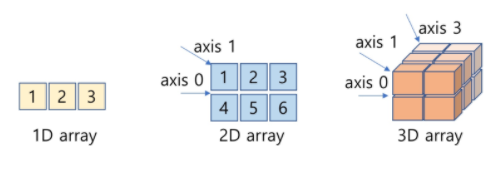

In [43]:
from IPython.display import Image
Image( 'C:/Users/ad/Desktop/일지/3주차 파이썬/res/res/np_0.png' )

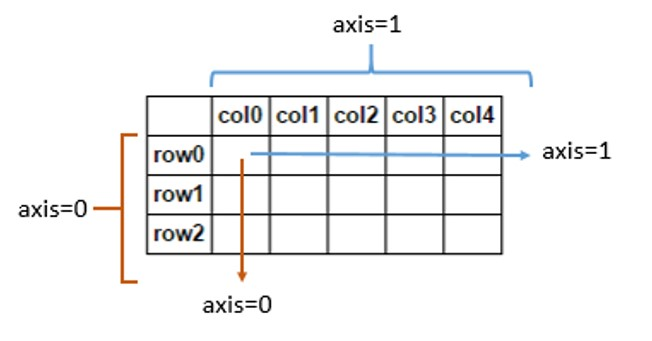

In [44]:
Image( 'C:/Users/ad/Desktop/일지/3주차 파이썬/res/res/DL0iQ.jpg' )

### 축
 - 위의 그림과 같이 
 - 행은 axis = 0 (각 열에 대한 행의 원소)
 - 열은 axis = 1 (각 행에 대한 열의 원소) 이다.

 - 계산할 때 axis를 주고 그 축에 대한 고정을 지정하면 고정된 축을 기준으로 내부의 값들이 계산된다.

In [45]:
# 축 알아보기
df_sax = pd.Series([1,2,3,4])
df_sax

# 결과 분석
# index 매개변수에 인자를 넣지 않았기에 index값은 0,1,2,3... 으로 자동생성
# 시리즈는 1차원이므로 0번 축인 열(axis=0)을 기준으로 만들어진다.
# 축을 고정해서 계산한다는 것은 행을 고정해서 계산하라는 뜻이다.
# 시리즈는 기본적으로 행에 대한 계산을 하기 때문이다.

0    1
1    2
2    3
3    4
dtype: int64

In [57]:
df_sax.sum(axis=0)
# 시리즈 객체에 있는 .sum 매소드에 axis 매개변수에 0을 입력하면 
# 행을 고정해서 그 내부의 원소를 계산하라는 뜻이다.
# 결과는 모든 원소를 더한 값이 정수로 출력된다.(1+2+3+4)

10

In [49]:
list_a = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
    ]

df = pd.DataFrame(data=list_a, columns=list('abc'))
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [55]:
print("df.sum()")
print(df.sum())

print("df.sum(axis=1)")
print(df.sum(axis=1))

print("df.sum(axis=0)")
print(df.sum(axis=0))

df.sum()
a    12
b    15
c    18
dtype: int64
df.sum(axis=1)
0     6
1    15
2    24
dtype: int64
df.sum(axis=0)
a    12
b    15
c    18
dtype: int64


## 1.3.4 수학 연산시 처리 규칙
 - 데이터 프레임 객체에 연산을 하면 단항(unary)연산자는 주로 하나의 객체를 처리하므로
 - 내부에 지정된 행과 열에 대한 레이블을 유지하지만
 - 이항(binary)연산자는 두개의 객체를 처리하므로
 - 행과 열의 레이블을 정렬(alignment)해서 비교한 후에 계산하므로 레이블이 정렬 처리된다.

In [61]:
np.random.randint(1,10,(3,3))

array([[8, 3, 2],
       [7, 8, 9],
       [4, 2, 1]])

In [63]:
df_1 = pd.DataFrame(data=np.random.randint(1,10,(3,3)), columns=(list("ABC")))
df_1


,A,B,C
0,4,5,3
1,8,9,3
2,5,3,1


In [65]:
df_2 = pd.DataFrame(data=np.random.randint(1,10,(3,3)), columns=(list("CAB")))
df_2

,C,A,B
0,2,9,2
1,5,5,3
2,7,9,3


In [66]:
np.log(df_2)


# 넘파이의 log 함수를 이용해서 데이터 프레임을 계산하면 현재 정의된 레이블은 유지되면서
# 계산결과에 새로운 데이터 프레임 객체를 반환한다.
# 단항연산자이기 때문에

,C,A,B
0,0.693147,2.197225,0.693147
1,1.609438,1.609438,1.098612
2,1.945910,2.197225,1.098612


In [67]:
df_1 + df_2


# 데이터 프레임 덧셈연산을하면
# 행과 열의 레이블을 맞춰 정렬하여
# 계산 후에 정렬된 데이터 프레임 객체를반환
# 덧셈연사는 이항 연산자이기 대문이다. 

,A,B,C
0,13,7,5
1,13,12,8
2,14,6,8


In [68]:
df_3 = pd.DataFrame(np.random.randint(1,10,(3,2)),columns=list('CB'))
df_3

,C,B
0,8,2
1,6,5
2,4,2


In [71]:
df_1 +df_3

# df_3도 마찬가지로 df_1과 덧셈연산을하기위해 index, column을 정렬하고 덧셈연산을 진행했다.
# 하지만 df_3에는 A 컬럼이 존재하지 않으므로 df_1과 연산하기 위해 A컬럼을 생성한다.
# A컬럼을 생성한 후 원소들의 값을 모두 NaN 처리한다.
# df_3의 새로 생긴 A컬럼의 원소들이 NaN 이기때문에 df_1의 A컬럼에 원소들이 수치를 가지고 있더라도
# NaN과 어떤 연산을 해도 NaN을 리턴하기때문에
# A컬럼의 연산결과는 NaN이된다.


,A,B,C
0,NaN,7,11
1,NaN,14,9
2,NaN,5,5


# 주피터 노트북과 파이썬을 이용한 데이터분석
## 손에 잡히는 판다스
### 문용준 지음 _ 2018.11.30 
#### 비제이퍼블릭 발행
##### 페이지 20 ~ 31 1.3.5 전까지